# Web scraping

In [ ]:
import requests                    # is the standard tool for composing HTTP requests in Python
from bs4 import BeautifulSoup      # this is a Python library for extracting data from HTML files                     
import re                          # to extract a digit from a string

URL = 'https://krisha.kz/prodazha/doma/'       # the address of the page that will extract the data


def extract_max_page():                            # get all pages in the paginator
    r = requests.get(URL)                          # get a web page using a get request, you can get all the information you need
    soup = BeautifulSoup(r.text, 'html.parser')    # put the response text in the soup variable         
    pages = []                                   
    paginator = soup.find_all('a', class_='paginator__btn') # let's see the paginator code
    for page in paginator:                                
        pages.append(int(page.get('data-page')))            # extract all numbers from the paginator
    return pages[-2]                                        # get the last page in the paginator


def extract_info(html):                                  # extract all information from the card
    urls = []                                 
    url = 'https://krisha.kz' + html.find('div', {'class': 'a-card__header-left'}).find('a')['href']  # link for each product
    urls.append(url)                                    
    for url in urls:                                     # get information from the product through the link
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')
        name = soup.find('div', class_='offer__advert-title').get_text(strip=True).partition(',')[0]
        city = soup.find('div', class_='offer__location offer__advert-short-info').find('span').text.partition(',')[0]
        address = soup.find('div', class_='offer__advert-title').get_text(strip=True).split(',')[-1]
        area = soup.find('div', class_='offer__advert-title').get_text(strip=True).split(',')[1]
        price = soup.find('div', class_='offer__price').get_text(strip=True).replace(u'\xa0', ' ')
        try:             # we will try to find and extract information
            try: 
                sot = soup.find('div', {'data-name': 'land.square'}).find_next('div', class_='offer__advert-short-info').text
            except:
                sot = soup.find('dt', {'data-name': 'land.square'}).find_next('dd').text
        except:           # if we didn’t find information, we will write 'None'
            sot = 'None'
        try:
            condition = soup.find('div', {'data-name': 'house.renovation'}).find_next('div', class_='offer__advert-short-info').text
        except:
            condition = 'None'
        try:
            toilet = soup.find('div', {'data-name': 'house.toilet'}).find_next('div', class_='offer__advert-short-info').text
        except:
            toilet = 'None'
        try:
            building1 = soup.find('div', {'data-name': 'house.building'}).find_next('div', class_='offer__advert-short-info').text
            building = int(re.search(r'\d+', building1).group(0))
        except:
            building = 'None'
        try:
            heating = soup.find('dt', {'data-name': 'cmtn.heating'}).find_next('dd').text
        except:
            heating = 'None'
        try:
            floor = soup.find('div', {'data-name': 'house.floor_num'}).find_next('div', class_='offer__advert-short-info').text
        except:
            floor = 'None'
        try:
            ceiling = soup.find('div', {'data-name': 'ceiling'}).find_next('div', class_='offer__advert-short-info').text
        except:
            ceiling = 'None'
        try:
            sewage = soup.find('dt', {'data-name': 'cmtn.sewage'}).find_next('dd').text
        except:
            sewage = 'None'

    return {'Заголовок': name, 'Город': city, 'Цена': price, 'Участок': sot, 'Адресс': address, 'Год': building, 'Площадь': area, 'Состояние': condition,
            'Санузел': toilet, 'Отопление': heating, 'Количество этаж': floor, 'Высота потолков': ceiling, 'Канализация': sewage}


def extract_houses(pages_to_extract):
    houses = []
    for page in range(1, pages_to_extract + 1):  # Iterate up to the specified number of pages
        print(f'Parsing page {page}')
        result = requests.get(f'{URL}?page={page}')
        soup = BeautifulSoup(result.text, 'html.parser')
        products = soup.find_all('div', class_='a-card__inc')
        for product in products:
            fact = extract_info(product)
            houses.append(fact)
    return houses

# Specify the number of pages to extract (in this case, 10)
pages_to_extract = 10
houses1 = extract_houses(pages_to_extract)

def save(houses1):
    file = open('houseslist.csv', mode='w', encoding='utf-8-sig', newline='')
    writer = csv.writer(file, delimiter=';')
    writer.writerow(['Заголовок', 'Город', 'Цена', 'Участок', 'Адресс', 'Год', 'Площадь', 'Состояние', 'Санузел', 'Отопление', 'Количество этаж', 'Высота потолков', 'Канализация'])
    for house in houses1:
        writer.writerow(list(house.values()))
    return

save(houses1)                                 # release the function to work

### Conclusion: With the help of web scraping, we get all the data about the house that is given in the classifieds website. Looking at the page code, we see the path that contains the data and parse it. When all pages are parsed, we will save all data to a csv file.

# Data preprocessing 

In [1]:
import numpy as np            # the main library for Python when it comes to mathematics
import pandas as pd           # software library in Python for data processing and analysis.
import csv                    # import csv file from our computer

In [ ]:
df = pd.read_csv('houses1.csv',delimiter=';')                # read the csv file

In [ ]:
df            

In [6]:
df.describe()            # df.describe () is a very useful method to get an idea of your df.

,Заголовок,Город,Цена,Участок,Адресс,Год,Площадь,Состояние,Санузел,Отопление,Количество этаж,Высота потолков,Канализация
count,20006,20006,20006,20006,20006,20006,20006,20006,20006,20006,20006,20006,20006
unique,29,651,1209,749,16247,91,1807,8,5,7,16,131,5
top,4-комнатный дом,Алматы,25 000 000〒,10 сот.,Старый город,None,100 м²,хорошее,совмещенный,на газе,1,None,септик
freq,4953,3843,744,3740,33,3335,1113,8393,5828,11012,10767,5816,10123


In [7]:
data = df.replace('None', np.nan)         # change 'None' to 'numpy NaN' to see missing values  

In [8]:
data.duplicated().sum()                   # looking for identical ads

1958

In [9]:
data.drop_duplicates(inplace=True)        # remove duplicates

In [10]:
data.duplicated().sum()                   # check if duplicates have been removed

0

In [11]:
data['Цена']=data['Цена'].str.replace(u'〒','').str.replace(u' ','')
data['Площадь']=data['Площадь'].str.replace(u'м²','')
data['Высота потолков']=data['Высота потолков'].str.replace(u'м','')
data['Участок']=data['Участок'].str.replace('сот.','', regex=True)
data['Площадь']=data['Площадь'].str.replace(u'6 сот.','0', regex=True)

In [12]:
percent_missing = (data.isnull().sum() * 100 / len(data)).round(2).sort_values(ascending=False)
percent_missing                            # let's see the percentage of missing data

Высота потолков    28.93
Канализация        23.96
Санузел            18.75
Год                16.72
Отопление          14.66
Количество этаж    11.41
Состояние           9.13
Участок             5.75
Заголовок           0.00
Город               0.00
Цена                0.00
Адресс              0.00
Площадь             0.00
dtype: float64

In [13]:
data = data.fillna({
    'Высота потолков': 0,
    'Канализация': 'Не указано',
    'Санузел':'Не указано',
    'Год': 0,
    'Отопление':'Не указано',
    'Количество этаж':0,
    'Состояние':'Не указано',
    'Участок':0
})                                                    # change all numerical values to 0, and strings to 'Не указано'

In [14]:
percent_missing = (data.isnull().sum() * 100 / len(data)).round(2).sort_values(ascending=False)
percent_missing                                       # check if there are missing data

Заголовок          0.0
Город              0.0
Цена               0.0
Участок            0.0
Адресс             0.0
Год                0.0
Площадь            0.0
Состояние          0.0
Санузел            0.0
Отопление          0.0
Количество этаж    0.0
Высота потолков    0.0
Канализация        0.0
dtype: float64

In [15]:
data       

,Заголовок,Город,Цена,Участок,Адресс,Год,Площадь,Состояние,Санузел,Отопление,Количество этаж,Высота потолков,Канализация
0,3-комнатный дом,Талдыкорган,19000000,7,Есетова,2018,140,не достроено,Не указано,на газе,0,0,Не указано
1,4-комнатный дом,Нур-Султан (Астана),51000000,10,Субханбердина 10/1,2008,130,евроремонт,2 с/у и более,центральное,2,3,центральная
2,5-комнатный дом,Алматы,395000000,14,Кербулакская 13,2008,375,хорошее,2 с/у и более,на газе,3,0,центральная
3,3-комнатный дом,Алматы,46800000,5.85,Кастеева 44А — Кабанбай батыра,0,50,Не указано,раздельный,на газе,1,2.8,центральная
4,7-комнатный дом,Сарыагаш,35000000,12,Самал 1 Естемесулы 60,2020,270,Не указано,Не указано,Не указано,0,0,Не указано
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20001,4-комнатный дом,Шымкент,45000000,8,улица Кахарман 221 — Сиргели,2003,110,хорошее,раздельный,на газе,1,2.8,центральная
20002,4-комнатный дом,Новая Бухтарма,16000000,3,Косова 7/3,1972,107,хорошее,2 с/у и более,центральное,2,2.7,септик
20003,5-комнатный дом,Серебрянск,8500000,10,Первомайская улица,2018,130,евроремонт,совмещенный,на твердом топливе,2,2.5,Не указано
20004,4-комнатный дом,Алматы,54000000,6,мкр Тастыбулак,2000,130,хорошее,совмещенный,на газе,2,0,септик


In [16]:
data.info()                                              # we see that the numeric data is of the object type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18048 entries, 0 to 20005
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Заголовок        18048 non-null  object
 1   Город            18048 non-null  object
 2   Цена             18048 non-null  object
 3   Участок          18048 non-null  object
 4   Адресс           18048 non-null  object
 5   Год              18048 non-null  object
 6   Площадь          18048 non-null  object
 7   Состояние        18048 non-null  object
 8   Санузел          18048 non-null  object
 9   Отопление        18048 non-null  object
 10  Количество этаж  18048 non-null  object
 11  Высота потолков  18048 non-null  object
 12  Канализация      18048 non-null  object
dtypes: object(13)
memory usage: 1.9+ MB


In [17]:
data['Цена'] = [int(x) if type(x) == str else x for x in data['Цена']]     # all numerical data change the type to numerical
data['Год']=data['Год'].astype(int)
data['Количество этаж']=data['Количество этаж'].astype(int)
data['Высота потолков']=data['Высота потолков'].astype(float)
data['Участок']=data['Участок'].astype(float)
data['Площадь']=data['Площадь'].astype(float)

In [18]:
data.info()                                                       # we see that everything has fallen into place

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18048 entries, 0 to 20005
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Заголовок        18048 non-null  object 
 1   Город            18048 non-null  object 
 2   Цена             18048 non-null  int64  
 3   Участок          18048 non-null  float64
 4   Адресс           18048 non-null  object 
 5   Год              18048 non-null  int32  
 6   Площадь          18048 non-null  float64
 7   Состояние        18048 non-null  object 
 8   Санузел          18048 non-null  object 
 9   Отопление        18048 non-null  object 
 10  Количество этаж  18048 non-null  int32  
 11  Высота потолков  18048 non-null  float64
 12  Канализация      18048 non-null  object 
dtypes: float64(3), int32(2), int64(1), object(7)
memory usage: 1.8+ MB


In [19]:
data = data.rename(columns={'Участок': 'Участок, сот', 'Площадь': 'Площадь, м²', 'Цена':'Цена, 〒'})
# since we have changed some data, we will add amendments to their name column

# Data Visualization

In [20]:
data['Заголовок'] = [int(x[:x.find('-')]) if type(x) == str else x for x in data['Заголовок']]
# We convert the number of rooms to integer, the number of rooms is indicated in the 'Заголовок' column

In [21]:
data.head()

,Заголовок,Город,"Цена, 〒","Участок, сот",Адресс,Год,"Площадь, м²",Состояние,Санузел,Отопление,Количество этаж,Высота потолков,Канализация
0,3,Талдыкорган,19000000,7.00,Есетова,2018,140.0,не достроено,Не указано,на газе,0,0.0,Не указано
1,4,Нур-Султан (Астана),51000000,10.00,Субханбердина 10/1,2008,130.0,евроремонт,2 с/у и более,центральное,2,3.0,центральная
2,5,Алматы,395000000,14.00,Кербулакская 13,2008,375.0,хорошее,2 с/у и более,на газе,3,0.0,центральная
3,3,Алматы,46800000,5.85,Кастеева 44А — Кабанбай батыра,0,50.0,Не указано,раздельный,на газе,1,2.8,центральная
4,7,Сарыагаш,35000000,12.00,Самал 1 Естемесулы 60,2020,270.0,Не указано,Не указано,Не указано,0,0.0,Не указано


In [22]:
data['Состояние'].unique()                                      # find the states of the house

array(['не достроено', 'евроремонт', 'хорошее', 'Не указано',
       'требует ремонта', 'черновая отделка', 'среднее',
       'свободная планировка'], dtype=object)

In [23]:
data['Санузел'].unique()                                        # find the states of the bathroom

array(['Не указано', '2 с/у и более', 'раздельный', 'совмещенный',
       'во дворе'], dtype=object)

In [24]:
data.loc[(data['Состояние'] == 'Не указано'), 'Состояние в цифрах'] = 0         # if 'Не указано' then 0
data.loc[(data['Состояние'] == 'не достроено'), 'Состояние в цифрах'] = 1       # if 'не достроено' then 1
data.loc[(data['Состояние'] == 'черновая отделка'), 'Состояние в цифрах'] = 2   # the rest on this principle
data.loc[(data['Состояние'] == 'требует ремонта'), 'Состояние в цифрах'] = 3
data.loc[(data['Состояние'] == 'свободная планировка'), 'Состояние в цифрах'] = 4
data.loc[(data['Состояние'] == 'среднее'), 'Состояние в цифрах'] = 5
data.loc[(data['Состояние'] == 'хорошее'), 'Состояние в цифрах'] = 6
data.loc[(data['Состояние'] == 'евроремонт'), 'Состояние в цифрах'] = 7
# give an estimate of the state in numbers to be used in the future in building a model

In [25]:
data.loc[(data['Санузел'] == 'Не указано'), 'Санузел в цифрах'] = 0
data.loc[(data['Санузел'] == 'во дворе'), 'Санузел в цифрах'] = 1
data.loc[(data['Санузел'] == 'совмещенный'), 'Санузел в цифрах'] = 2
data.loc[(data['Санузел'] == 'раздельный'), 'Санузел в цифрах'] = 3
data.loc[(data['Санузел'] == '2 с/у и более'), 'Санузел в цифрах'] = 4
# give an estimate of the state in numbers to be used in the future in building a model

In [26]:
data.head()                                      

,Заголовок,Город,"Цена, 〒","Участок, сот",Адресс,Год,"Площадь, м²",Состояние,Санузел,Отопление,Количество этаж,Высота потолков,Канализация,Состояние в цифрах,Санузел в цифрах
0,3,Талдыкорган,19000000,7.00,Есетова,2018,140.0,не достроено,Не указано,на газе,0,0.0,Не указано,1.0,0.0
1,4,Нур-Султан (Астана),51000000,10.00,Субханбердина 10/1,2008,130.0,евроремонт,2 с/у и более,центральное,2,3.0,центральная,7.0,4.0
2,5,Алматы,395000000,14.00,Кербулакская 13,2008,375.0,хорошее,2 с/у и более,на газе,3,0.0,центральная,6.0,4.0
3,3,Алматы,46800000,5.85,Кастеева 44А — Кабанбай батыра,0,50.0,Не указано,раздельный,на газе,1,2.8,центральная,0.0,3.0
4,7,Сарыагаш,35000000,12.00,Самал 1 Естемесулы 60,2020,270.0,Не указано,Не указано,Не указано,0,0.0,Не указано,0.0,0.0


In [27]:
import matplotlib.pyplot as plt      # with it you will need much less words in the code to create high-quality graphs
import seaborn as sb                 # it is a library for generating statistical graphs in Python

Text(0, 0.5, 'Count')

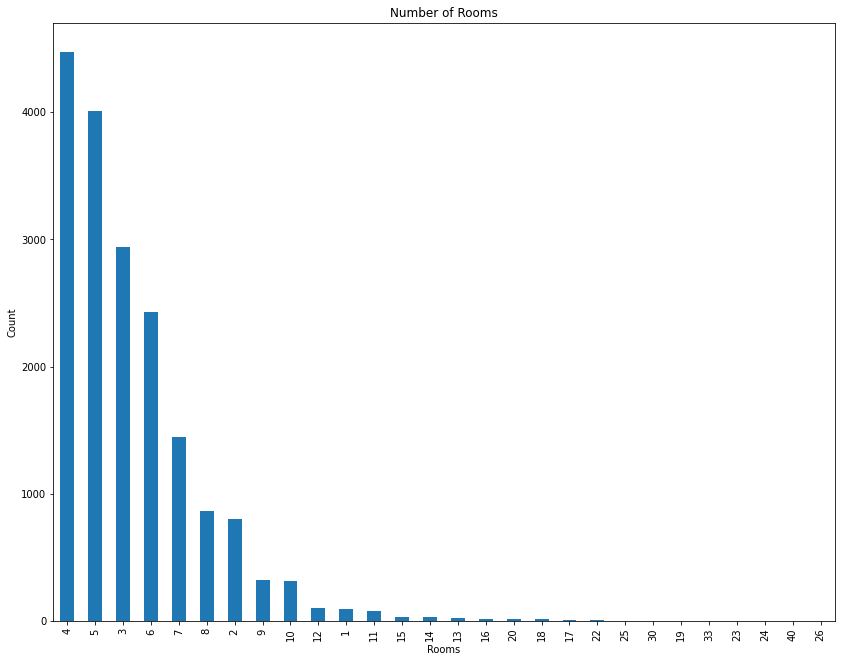

In [28]:
a4_dims = (14, 11)                                             # assigning size of plot to variable
fig, ax = plt.subplots(figsize=a4_dims)                        # assigning sizes to plot
data['Заголовок'].value_counts().plot(kind='bar', ax = ax)     # creating bar chart
                # value_counts() function returns object containing counts of unique values
plt.title('Number of Rooms')                                   # title of number of rooms
plt.xlabel('Rooms')                                            # x label title
plt.ylabel('Count')                                            # y label title

## Heatmaps are very useful to find relations between two variables in a dataset. Heatmap can be easily produced using the ‘heatmap’ function provided by the seaborn package in python. 

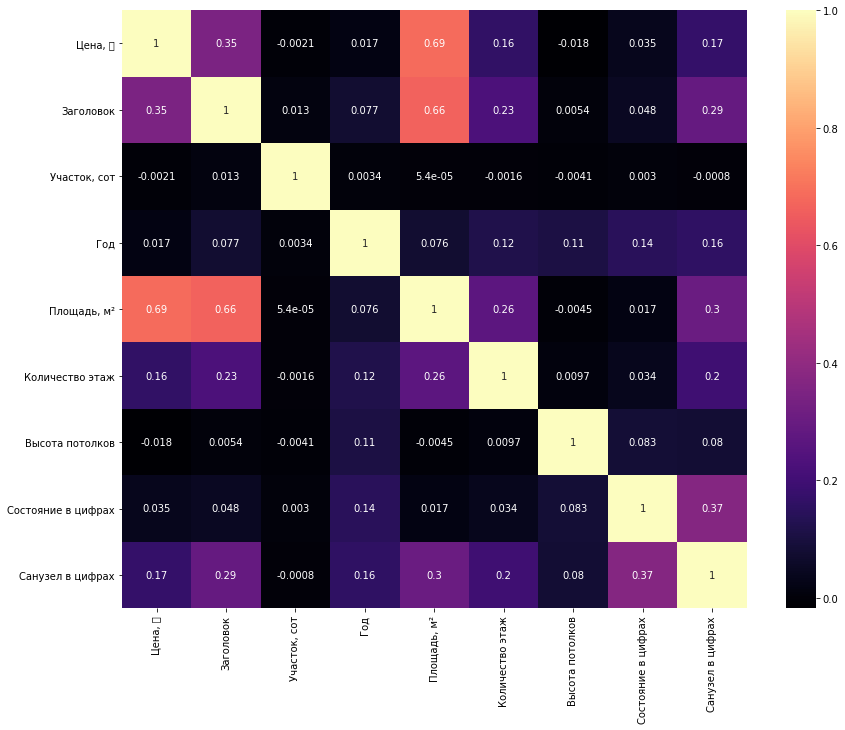

In [74]:
a4_dims = (14, 11)                                           # assigning size of plot to variable
fig, ax = plt.subplots(figsize=a4_dims)                      # assigning sizes to plot
names=['Цена, 〒', 'Заголовок', 'Участок, сот', 'Год', 'Площадь, м²', 'Количество этаж', 'Высота потолков', 'Состояние в цифрах', 'Санузел в цифрах']
df=data[names]                                               # taking numeric value columns
sb.heatmap(df.corr(), ax = ax, annot = True, cmap = 'magma') # creating heatmap, corr() is used to find the pairwise correlation of all columns in the dataframe.
plt.show()

## Distribution plots are very useful to check how well a variable is distributed in the dataset. Let’s now produce a distribution plot using the ‘distplot’ function to check the distribution of the ‘House Price’ variable in the dataset.

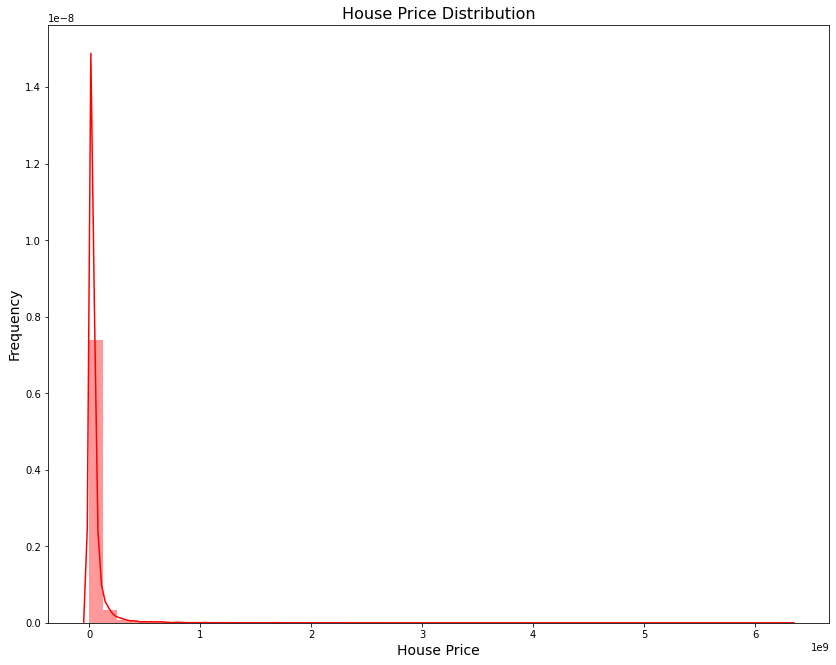

In [75]:
a4_dims = (14, 11)                                           # assigning size of plot to variable
fig, ax = plt.subplots(figsize=a4_dims)                      # assigning sizes to plot
sb.distplot(df['Цена, 〒'], ax=ax, color = 'r')              # creating distribution plot form House price, color is red
plt.title('House Price Distribution', fontsize = 16)         # plot title and font size
plt.xlabel('House Price', fontsize = 14)                     # x label and size
plt.ylabel('Frequency', fontsize = 14)                       # y label and size
plt.show()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## A scatter plot is used to observe linear relations between two variables in a dataset. In a scatter plot, the dependent variable is marked on the x-axis and the independent variable is marked on the y-axis. In our case, the ‘Цена Дома’ attribute is the dependent variable, and every other are the independent variables.

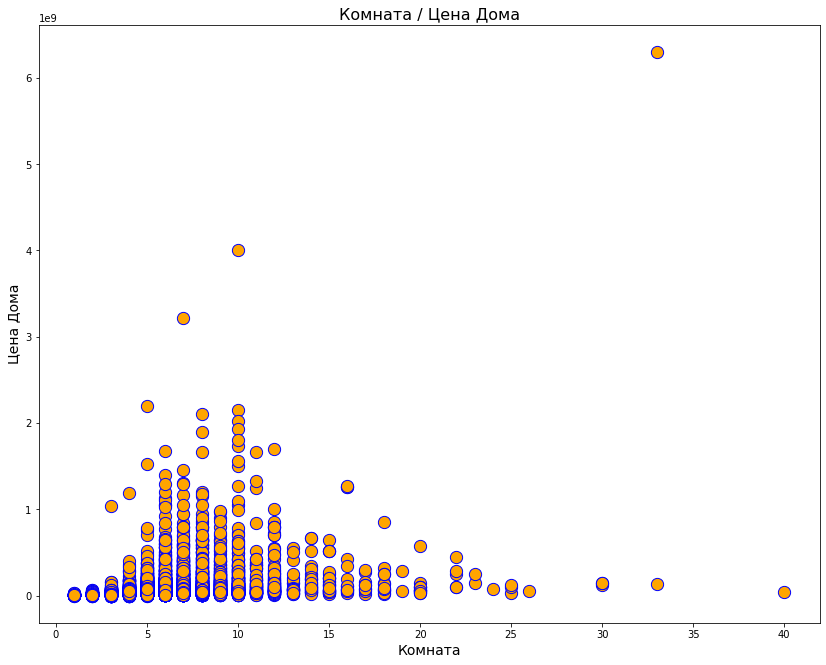

In [76]:
a4_dims = (14, 11)                                                             # assigning size of plot to variable
fig, ax = plt.subplots(figsize=a4_dims)                                        # assigning sizes to plot
            # creating scatter plot, relation between Заголовок(число комнат) and Цена Дома
plot1 = sb.scatterplot('Заголовок', 'Цена, 〒', data = data, ax = ax, color = 'orange', edgecolor = 'b', s = 150)
plt.title('Комната / Цена Дома', fontsize = 16)                                # plot title and font size
plt.xlabel('Комната', fontsize = 14)                                           # x label and font size
plt.ylabel('Цена Дома', fontsize = 14)                                         # y label and font size
plt.show() 

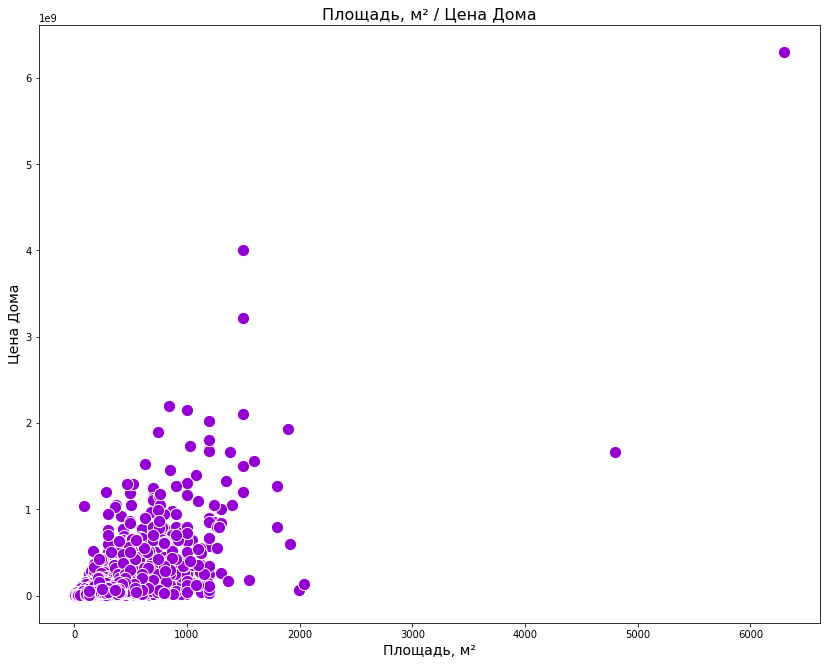

In [77]:
a4_dims = (14, 11)                                                                # assigning size of plot to variable
fig, ax = plt.subplots(figsize=a4_dims)                                           # assigning sizes to plot
                   # creating scatter plot, relation between Площадь and Цена Дома
plot1 = sb.scatterplot('Площадь, м²', 'Цена, 〒', data = data, ax = ax, color = 'darkviolet', edgecolor = 'w', s = 150)
plt.title('Площадь, м² / Цена Дома', fontsize = 16)                               # plot title and font size
plt.xlabel('Площадь, м²', fontsize = 14)                                          # x label and font size
plt.ylabel('Цена Дома', fontsize = 14)                                            # y label and font size
plt.show() 

# Machine Learning. House price prediction

In [78]:
data['price_log'] = np.log(data['Цена, 〒'])
# Converting price house value to natural logarithm to get positive predicted value

In [79]:
data

,Заголовок,Город,"Цена, 〒","Участок, сот",Адресс,Год,"Площадь, м²",Состояние,Санузел,Отопление,Количество этаж,Высота потолков,Канализация,Состояние в цифрах,Санузел в цифрах,price_log
0,3,Талдыкорган,19000000,7.00,Есетова,2018,140.0,не достроено,Не указано,на газе,0,0.0,Не указано,1.0,0.0,16.759950
1,4,Нур-Султан (Астана),51000000,10.00,Субханбердина 10/1,2008,130.0,евроремонт,2 с/у и более,центральное,2,3.0,центральная,7.0,4.0,17.747336
2,5,Алматы,395000000,14.00,Кербулакская 13,2008,375.0,хорошее,2 с/у и более,на газе,3,0.0,центральная,6.0,4.0,19.794396
3,3,Алматы,46800000,5.85,Кастеева 44А — Кабанбай батыра,0,50.0,Не указано,раздельный,на газе,1,2.8,центральная,0.0,3.0,17.661394
4,7,Сарыагаш,35000000,12.00,Самал 1 Естемесулы 60,2020,270.0,Не указано,Не указано,Не указано,0,0.0,Не указано,0.0,0.0,17.370859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20001,4,Шымкент,45000000,8.00,улица Кахарман 221 — Сиргели,2003,110.0,хорошее,раздельный,на газе,1,2.8,центральная,6.0,3.0,17.622173
20002,4,Новая Бухтарма,16000000,3.00,Косова 7/3,1972,107.0,хорошее,2 с/у и более,центральное,2,2.7,септик,6.0,4.0,16.588099
20003,5,Серебрянск,8500000,10.00,Первомайская улица,2018,130.0,евроремонт,совмещенный,на твердом топливе,2,2.5,Не указано,7.0,2.0,15.955577
20004,4,Алматы,54000000,6.00,мкр Тастыбулак,2000,130.0,хорошее,совмещенный,на газе,2,0.0,септик,6.0,2.0,17.804495


In [80]:
# Assigning these columns to X as independent values (numpy array)
X = data[['Заголовок', 'Участок, сот', 'Год', 'Площадь, м²', 'Количество этаж', 'Высота потолков', 'Состояние в цифрах', 'Санузел в цифрах']].values
y = data['price_log'].values                  # taking price_log column as dependent value, we are going to predict price_log

In [81]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='mean')
imputer.fit(X[:, :])
X[:, :] = imputer.transform(X[:, :])
                   # Taking care of missing values, we've assigned to them 0. Now we assign to them average value of the column

In [82]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
                   # Splitting the dataset into the Training set and Test set

In [83]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
                   # Training the Multiple Linear Regression model on the Training set

LinearRegression()

In [84]:
y_pred = regressor.predict(X_test)
                   # Predicting the Test set results

In [85]:
print(regressor.score(X_test, y_test))
                   # Accuracy of prediction is 57%

0.5728760478865429


In [86]:
y_test = np.exp(y_test)
y_test
                    # Converting test price_log to initial House price through exp method

array([35000000.00000002, 22999999.99999999,  1000000.        , ...,
        8500000.        , 22999999.99999999, 52500000.        ])

In [87]:
y_pred = np.exp(y_pred)
y_pred
                    # Converting predicted price_log to initial House price through exp method

array([25268429.47150438, 26788883.1309056 , 13539300.01050828, ...,
       16852942.3410241 , 50476370.43680277, 34710790.28533939])

In [88]:
X_test[10]          # taking 10 element's values to make predict

array([4.00000000e+00, 1.00000000e+01, 1.99600000e+03, 1.20000000e+02,
       1.53086497e+00, 3.32164580e+00, 5.00000000e+00, 2.66087016e+00])

In [89]:
y_test[10]          # real price of 10's house, roughly 16000000

15999999.999999998

In [90]:
print(np.exp(regressor.predict([[4.00e+00, 1.00e+01, 2.00e+03, 1.20e+02, 1.53e+00, 3.32e+00,
       4.00e+00, 2.66e+00]])))
# predicting by putting 10 elment's value, converting to initial House price through exp method
# Predicted values is 15865625.87

[15865625.86945808]


In [91]:
X_test[1]            # taking 1 element's values to make predict

array([6.00000000e+00, 8.00000000e+00, 2.02100000e+03, 1.65000000e+02,
       1.00000000e+00, 3.32164580e+00, 5.65621951e+00, 2.66087016e+00])

In [92]:
y_test[1]            # real price of 1st house, roughly 23000000

22999999.99999999

In [93]:
print(np.exp(regressor.predict([[6.00e+00, 8.00e+00, 2.02e+03, 1.65e+02, 1.00e+00, 3.32e+00,
       4.73e+00, 2.66e+00]])))
# predicting by putting 1 elment's value
# Predicted values is 23508906.90

[23508906.89740929]


# In conclusion, we can predict house prices based on their properties using multiple linear regression, which in turn is the basis of machine learning.